
# Project:Further investigation No show appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information
from 100k medical appointments in
Brazil - where i will be analyzing why and the factors affecting the Patient NO show to the appointments dilemma  




### Question(s) for Analysis
- What factors allows us to predict whether the patient will show up for their appointment ?



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sna
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

In [3]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.shape

(110527, 14)

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Alert column name error Hipertension 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 - No null values 

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Alert - number at the min age 

In [7]:
df.duplicated().sum()

0

No duplicates Rows


### Data Cleaning
 

In [8]:
#drop the - Age value
df_1 = df.query('Age == "-1"')
df_1

df.drop(index =99832, inplace=True)

In [9]:
# rename column 
df.rename({'Hipertension' : 'Hypertension'}, axis = 1,  inplace = True)
df.rename({'No-show' : 'No_show'}, axis = 1, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# check if there duplicated id and their attendance and drop them
df['PatientId'].duplicated().sum()
df.drop_duplicates(['PatientId', 'No_show' ], inplace = True)
df.shape

(71816, 14)

In [11]:
#drop unnecessary columns
df.drop(columns = ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# we can split Data into two according to the NO-show column
df['No_show'].value_counts()
NoShow = df.No_show == 'Yes'
Show = df.No_show == 'No'
# see the count of show and no show
df[NoShow].count(), df[Show].count()

(Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64, Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question1 What factors allows us to predict whether the patient will show up for their appointment ?


In [13]:
df[NoShow].mean()

Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handcap          0.017777
SMS_received     0.453094
dtype: float64

In [14]:
df[Show].mean()

Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alcoholism       0.023600
Handcap          0.020904
SMS_received     0.297232
dtype: float64

The mean age is almost equal in each category  /  
nothing else can be recognized but the SMS_received its almost double at NoShow !

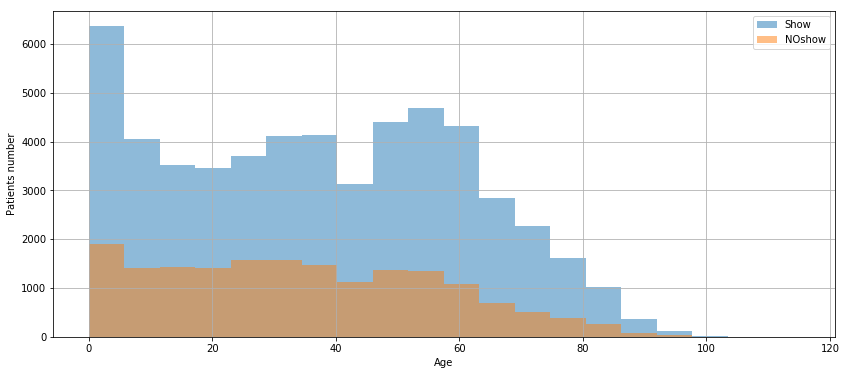

In [26]:
# how age affect the showing def
def showing(df, column, show, noshow):
    
    plt.figure(figsize=(14,6))
    df[column][Show].hist(alpha=0.5, bins =20, label= 'Show')
    df[column][NoShow].hist(alpha=0.5, bins =20, label= 'NOshow')
    plt.legend();
    plt.xlabel('Age')
    plt.ylabel('Patients number')
    
showing(df, 'Age', Show, NoShow)   

its clear that younger patients (children) is the most attendance due to their parents !      
and the least attendance is the eldest patients


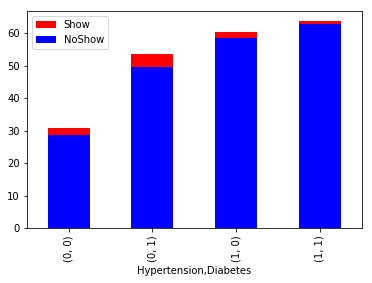

In [40]:
#dose  age with diseases effect the showing ?
df[Show].groupby(['Hypertension','Diabetes' ]).Age.mean().plot(kind = 'bar', color = 'red', label = 'Show')
df[NoShow].groupby(['Hypertension','Diabetes']).Age.mean().plot(kind = 'bar', color = 'blue', label = 'NoShow')
plt.legend()

No the diseases dosn't affect the showing !

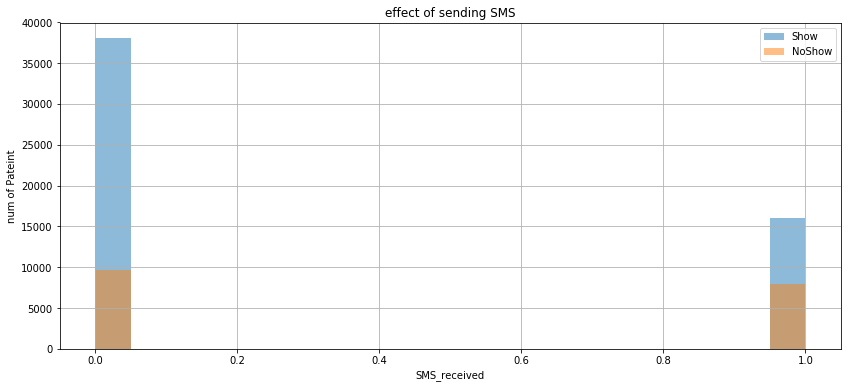

In [46]:
# the effect of sending SMS to the Patient on the showing
def showing_2(df, column, show, noshow):
    plt.figure(figsize=(14,6))
    df[column][Show].hist(alpha = 0.5, bins = 20, label = 'Show')
    df[column][NoShow].hist(alpha = 0.5, bins = 20, label = 'NoShow')
    plt.legend();
    plt.title('effect of sending SMS')
    plt.xlabel('SMS_received')
    plt.ylabel('num of Pateint')

showing_2(df, 'SMS_received', Show, NoShow)    

according to this hist the % of showing Patients whom didn't received the SMS is bigger than the % of whom received SMS !!

In [48]:
# dose the Gender has an effect on the num of showing ?!
df['Gender'].value_counts()

F    46466
M    25350
Name: Gender, dtype: int64

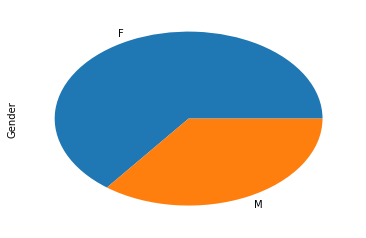

In [55]:
df[Show]['Gender'].value_counts().plot(kind = 'pie')

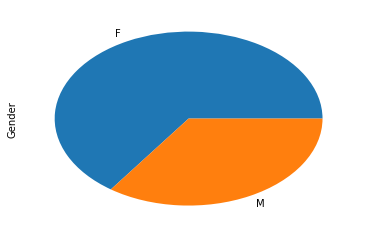

In [56]:
df[NoShow]['Gender'].value_counts().plot(kind= 'pie')

the % of Show and NoShow of males and females almost identical so i don't think Gender affect the showing.

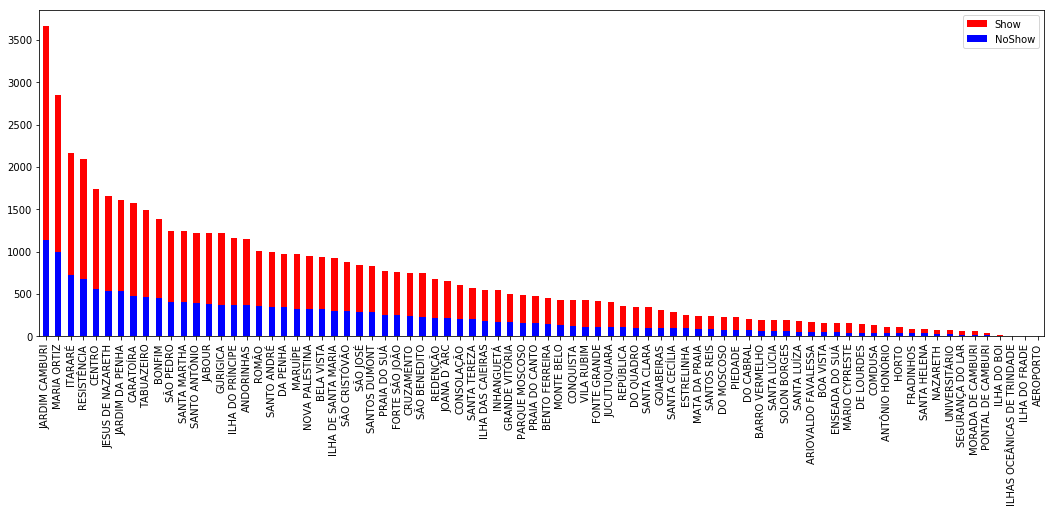

In [62]:
plt.figure(figsize=(18,6))
df[Show]['Neighbourhood'].value_counts().plot(kind = 'bar', color= 'red', label = 'Show')
df[NoShow]["Neighbourhood"].value_counts().plot(kind = 'bar', color = 'blue', label = 'NoShow')
plt.legend()

yes the Neighbourhood affected the showing of Patients.

<a id='conclusions'></a>
## Conclusions

- Firstly, i can summarize my Data Wrangling and Data Cleaning : i faced no problem at all assessing the data and clean it as it just contains few errors,like one age cell was negative and some un porper columns name like(hiper and the - instead of _).
- second the analyzing process was a little bit complicated and i found that :-
  - The Age has a big effect on the showing of the patient as the children are often showing than the least showing the elder.
  - Then we tested the Age once more but with the diseases this time and we found out that the diseases dosen't effect the         showing.
  - Third step was checking whether sending SMS was crucial for showing Patient or not but iam surprised that its vice verca as     the percantage of Showing Patients whom didn't receive an SMS is much higher than whom received,we can conclude that there     is a problem at the content and context of the SMS needed to be checked well.
  - Then i checked the effect of the Gender on the showing and i found that it has no strong effect on the showing.
  - Lastly i check the effect of the Neighbourhood on the Patients showing and yes as expected it affected the showing.





In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0